## Exercise 2.1

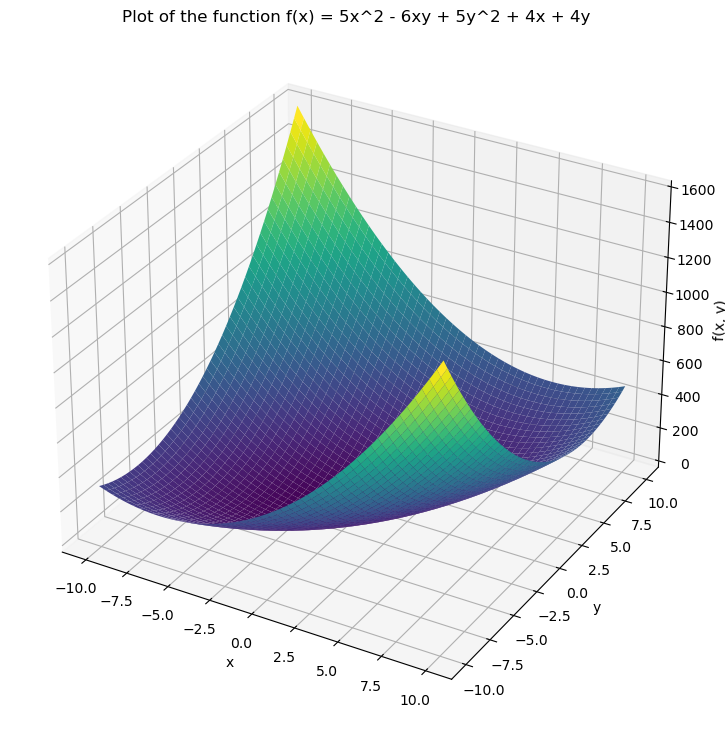

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y)
def f(x, y):
    return 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y

# Create a grid of points
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Plot the function
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Plot of the function f(x) = 5x^2 - 6xy + 5y^2 + 4x + 4y')

# Show the plot
plt.show()

## Exercise 2.2

In [49]:
from scipy.optimize import minimize

# Define the function to minimize
def func_to_minimize(x):
    return 5*x[0]**2 - 6*x[0]*x[1] + 5*x[1]**2 + 4*x[0] + 4*x[1]

# Initial guess for x and y
initial_guess = [0, 0]

# Use scipy's minimize function to find the minimum
result = minimize(func_to_minimize, initial_guess)

# The result object contains various information from the optimization process
xmin_scipy = result.x
fmin_scipy = result.fun

xmin_scipy, fmin_scipy

(array([-1.00000001, -1.00000001]), -4.0)

## Exercise 2.3

To express the given function in the form $f(x) = \frac{1}{2}x^T Hx + d^T x + c$, we identify the quadratic, linear, and constant parts of $f(x, y) = 5x^2 - 6xy + 5y^2 + 4x + 4y$.

The quadratic form $\frac{1}{2}x^T Hx$ corresponds to the part of the function involving $ x^2 $ and $ y^2 $, and the mixed term $ xy $. For our function, $ H $ is a 2x2 matrix where the diagonal elements are the coefficients of $ x^2 $ and $ y^2 $ (multiplied by 2 because of the $ \frac{1}{2} $ in front of the quadratic form), and the off-diagonal elements are half of the coefficient of the $ xy $ term (since $ x^T Hx $ will produce two $ xy $ terms when expanded). The vector $ d $ contains the coefficients of the linear terms $ x $ and $ y $, and $ c $ is the constant term.

Let's write down the matrix $ H $, the vector $ d $, and the constant $ c $, and then we can determine whether $ H $ is positive definite.

The matrix $ H $ is:
\begin{equation}
H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}
\end{equation}

The vector $ d $ is:
\begin{equation}
d = \begin{bmatrix} 4 \\ 4 \end{bmatrix}
\end{equation}

The constant $ c $ is zero in this case since there is no constant term in the function $ f(x) $.

To check if $ H $ is positive definite, we can look at its eigenvalues: a symmetric matrix is positive definite if and only if all its eigenvalues are positive. Let's compute the eigenvalues.

The matrix $ H $, vector $ d $, and constant $ c $ for the function $ f(x) $ are:

\begin{equation}
H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}, \quad d = \begin{bmatrix} 4 \\ 4 \end{bmatrix}, \quad c = 0
\end{equation}

The eigenvalues of $ H $ are $ [16, 4] $. Since all eigenvalues are positive, the matrix $ H $ is positive definite. This indicates that the function $ f(x) $ is convex, and therefore the point found earlier, $ x_{\text{min}} = (-1, -1) $, is indeed the global minimum of the function.

The matrix $ H $ in the expression $ f(x) = \frac{1}{2}x^T Hx + d^T x + c $ is called the Hessian matrix of the function $ f $. In the context of optimization and calculus, the Hessian matrix is a square matrix of second-order partial derivatives of a scalar-valued function, or scalar field. It describes the local curvature of a function of many variables.

## Exercise 2.4

The gradient descent (GD) method is defined by the iteration:

\begin{equation}
x_{k+1} = x_k - \alpha \nabla f(x_k)
\end{equation}

where $ \alpha $ is the learning rate. The function $ f $ can be written in the form $ f(x) = \frac{1}{2}x^T Hx + d^T x + c $, where $ H $ is the Hessian matrix, $ d $ is a vector of coefficients for the linear terms, and $ c $ is a constant. The gradient $ \nabla f(x) $ is then given by:

\begin{equation}
\nabla f(x) = Hx + d
\end{equation}

Substituting the gradient into the GD iteration gives:
\begin{equation}
x_{k+1} = x_k - \alpha (Hx_k + d)
\end{equation}
For gradient descent to be convergent, the spectral radius $ \rho $ of the iteration matrix must be less than 1. The iteration matrix in this case would be $ I - \alpha H $, where $ I $ is the identity matrix.

The spectral radius $ \rho $ is the largest absolute value among the eigenvalues of the iteration matrix. Therefore, we require:
\begin{equation}
\rho(I - \alpha H) < 1
\end{equation}

This inequality must be satisfied by all eigenvalues $ \lambda_i $ of $ H $:
\begin{equation}
\left| 1 - \alpha \lambda_i \right| < 1
\end{equation}

Thus:

\begin{equation}
    \begin{cases}
      1 - \alpha \lambda_i < 1 &\implies \alpha \lambda_i > 0&, 1 - \alpha \lambda_i > 0 \\
      -1+\alpha \lambda_i < 1 &\implies \alpha < \frac{2}{\lambda_i}&, 1 - \alpha \lambda_i < 0
    \end{cases}\,.
\end{equation}




## Exercise 2.5

Considering that $\alpha \lambda_i$ is always positive given that the eigenvalues are $[16, 4]$, and that $16$ is the largest eigenvalue, we have that:

\begin{equation}
    \alpha < \frac{2}{16} = \frac{1}{8}
\end{equation}

## Exercise 2.6

In [1]:
def gradient_descent(f, grad_f, initial_x, alpha, epsilon, max_iterations):
    """
    Implements the gradient descent optimization algorithm.
    
    :param f: The function to be minimized.
    :param grad_f: The gradient of the function.
    :param initial_x: Initial guess for the minimum.
    :param alpha: Learning rate.
    :param epsilon: Convergence tolerance.
    :param max_iterations: Maximum number of iterations.
    :return: The approximate minimum point.
    """
    x = np.array(initial_x, dtype=float)
    for _ in range(max_iterations):
        x_new = x - alpha * np.array(grad_f(x))
        # Check for convergence
        if np.abs(f(x_new) - f(x)) < epsilon:
            return x_new
        x = x_new
    return x

import jax
import jax.numpy as jnp
import numpy as np

# Define the function f(x, y) using jax.numpy
def func_jax(x):
    return 5*x[0]**2 - 6*x[0]*x[1] + 5*x[1]**2 + 4*x[0] + 4*x[1]

# Use jax.grad to automatically compute the gradient of the function
grad_func_jax = jax.grad(func_jax)

# Initial guess, learning rate, tolerance, and maximum iterations
initial_guess = [-5, 7]
learning_rate = 0.125  # from previous calculation
tolerance = 1e-3
max_iterations = 200

# Perform gradient descent
xmin_gd = gradient_descent(func_jax, grad_func_jax, initial_guess, learning_rate, tolerance, max_iterations)

f"Minimum point: {xmin_gd}, Minimum value: {func_jax(xmin_gd)}, did not converge near the true minimum"

'Minimum point: [-6.9921875  5.0078125], Minimum value: 572.000244140625, did not converge near the true minimum'

In [2]:
# Initial guess, learning rate, tolerance, and maximum iterations
initial_guess = [-5, 7]
learning_rate = 0.123  # from previous calculation
tolerance = 1e-3
max_iterations = 200

# Perform gradient descent
xmin_gd = gradient_descent(func_jax, grad_func_jax, initial_guess, learning_rate, tolerance, max_iterations)

f"Minimum point: {xmin_gd}, Minimum value: {func_jax(xmin_gd)}, converged near the minimum"

'Minimum point: [-0.97008847 -1.02991164], Minimum value: -3.985684753178961, converged near the minimum'